### Loan Prediction using Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Default_Fin.csv")
df.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [3]:
df.shape

(10000, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [5]:
df.drop(["Index"], axis=1, inplace=True)

In [6]:
df.head()

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


#### Let us assume that 0 is Not approved, 1 is approved

### Missing Values

In [7]:
df.isnull().sum()

Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

### Categorical variables

In [8]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

[]

In [9]:
Numerical_features = [feature for feature in df.columns if df[feature].dtypes!='O']
Numerical_features

['Employed', 'Bank Balance', 'Annual Salary', 'Defaulted?']

In [10]:
discrete_features = [feature for feature in Numerical_features if len(df[feature].unique())<25]
discrete_features

['Employed', 'Defaulted?']

In [11]:
continous_features = [feature for feature in Numerical_features if feature not in discrete_features]
continous_features

['Bank Balance', 'Annual Salary']

### Let us visualise the discrete variables

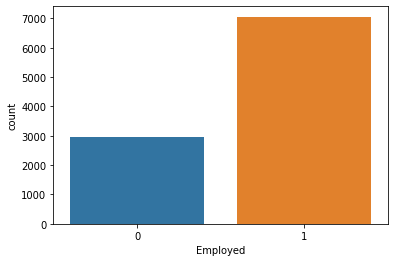

In [12]:
sns.countplot(x = df['Employed'])
plt.show()

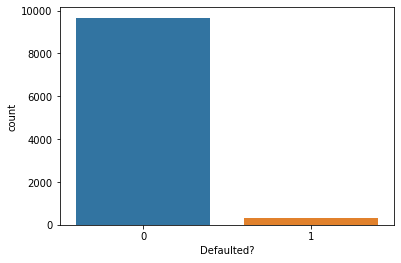

In [13]:
sns.countplot(x = df["Defaulted?"])
plt.show()

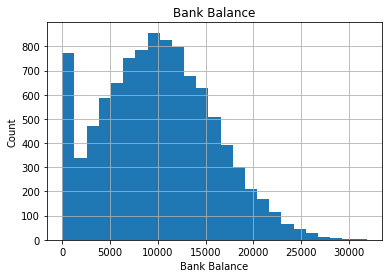

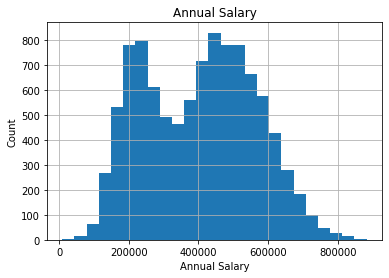

In [14]:
### Let us have a look over the continous features

for feature in continous_features:
    data = df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Outlier Detection

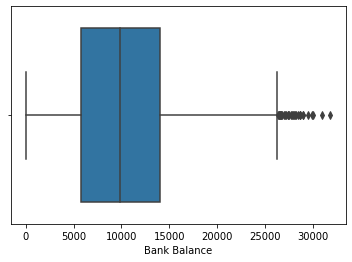

In [15]:
### Let us have a look over the outliers
sns.boxplot(x = df["Bank Balance"])
plt.show()

So, there is a chance of doing log transformation on bank balance attribute to convert it into normal distribution

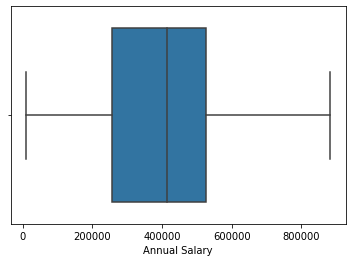

In [16]:
sns.boxplot(x = df["Annual Salary"])
plt.show()

In [17]:
S = df.iloc[:,:-1]
S.head()

,Employed,Bank Balance,Annual Salary
0,1,8754.36,532339.56
1,0,9806.16,145273.56
2,1,12882.60,381205.68
3,1,6351.00,428453.88
4,1,9427.92,461562.00


In [18]:
T = df.iloc[:,-1]
T.head()

0    0
1    0
2    0
3    0
4    0
Name: Defaulted?, dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

S = scaler.fit_transform(S)

In [20]:
from sklearn.model_selection import train_test_split
S_train, S_test, T_train, T_test = train_test_split(S, T, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [22]:
model.fit(S_train, T_train)

LogisticRegression()

In [23]:
from sklearn.metrics import accuracy_score
T_pred = model.predict(S_test)

In [24]:
score = accuracy_score(T_test, T_pred)
score

0.9695

In [25]:
from sklearn.metrics import classification_report

print(classification_report(T_test, T_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1931
           1       0.63      0.28      0.38        69

    accuracy                           0.97      2000
   macro avg       0.80      0.63      0.68      2000
weighted avg       0.96      0.97      0.96      2000



In [26]:
### Save the model

import pickle
pickle.dump(model, open("model.pkl", "wb"))